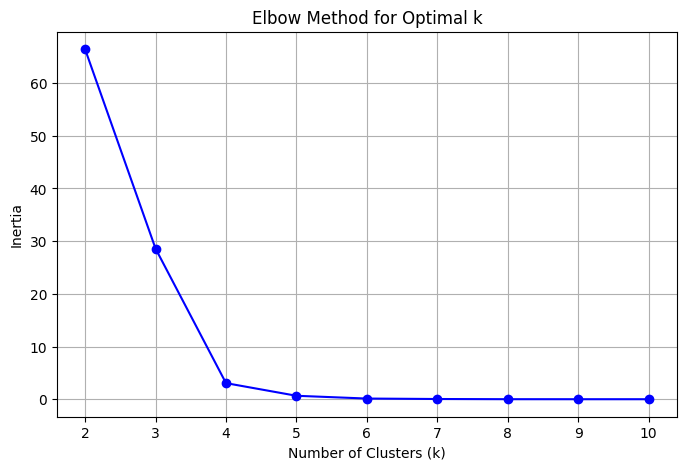

Silhouette Score for k=2: 0.6902
Silhouette Score for k=3: 0.6640
Silhouette Score for k=4: 0.6662
Silhouette Score for k=5: 0.5537
Silhouette Score for k=6: 0.4833
Silhouette Score for k=7: 0.4081
Silhouette Score for k=8: 0.3728
Silhouette Score for k=9: 0.2980
Silhouette Score for k=10: 0.1899
            Vehicle_Category  Cluster
0        HEAVY GOODS VEHICLE        1
1        HEAVY MOTOR VEHICLE        1
2    HEAVY PASSENGER VEHICLE        1
3        LIGHT GOODS VEHICLE        1
4        LIGHT MOTOR VEHICLE        0
5    LIGHT PASSENGER VEHICLE        1
6       MEDIUM GOODS VEHICLE        1
7       MEDIUM MOTOR VEHICLE        1
8   MEDIUM PASSENGER VEHICLE        1
9          THREE WHEELER(NT)        1
10          THREE WHEELER(T)        2
11           TWO WHEELER(NT)        3
12            TWO WHEELER(T)        1


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Load the dataset
data = pd.read_csv("vehicle_fuel.csv")

# Step 2: Clean and preprocess
# Remove commas and convert to integers for all numeric columns
data_cleaned = data.copy()
for col in data.columns[1:-1]:  # Skip 'Vehicle_Category' and 'Total'
    data_cleaned[col] = data[col].astype(str).str.replace(',', '').astype(int)

# Step 3: Normalize the data (excluding 'Vehicle_Category' and 'Total')
features = data_cleaned.drop(columns=["Vehicle_Category", "Total"])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 4: Elbow Method to find optimal k
inertia = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Step 5: Silhouette Score for each k
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    print(f"Silhouette Score for k={k}: {score:.4f}")

# Step 6: Final KMeans with optimal k (update based on results)
optimal_k = 4  # ← Set this based on elbow and silhouette results
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = final_kmeans.fit_predict(scaled_features)

# Add cluster assignments to the cleaned data
data_cleaned["Cluster"] = clusters

# Step 7: Save result to CSV (optional)
data_cleaned.to_csv("clustered_data.csv", index=False)

# Step 8: Show cluster assignment per vehicle category
print(data_cleaned[["Vehicle_Category", "Cluster"]])


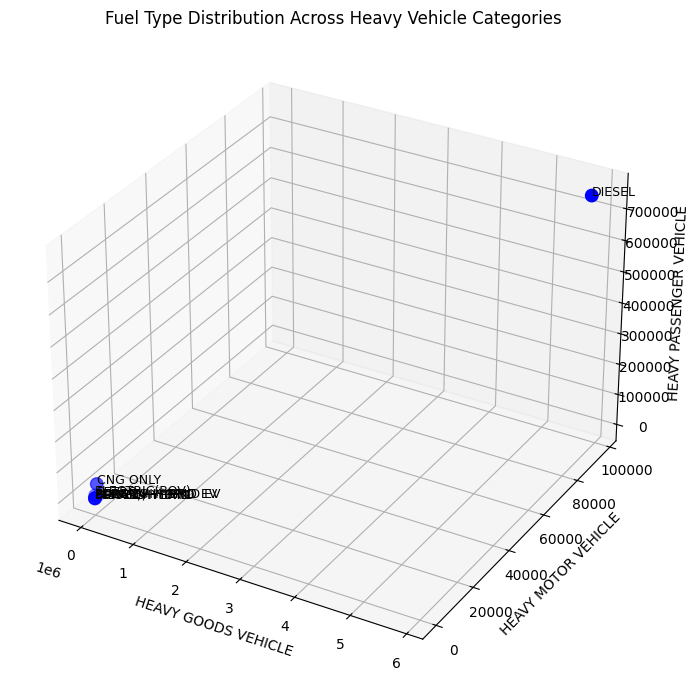

C:\Users\prash\AppData\Local\Temp\ipykernel_31352\3581397735.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(x[i], y[i], z[i], fuel, fontsize=9)


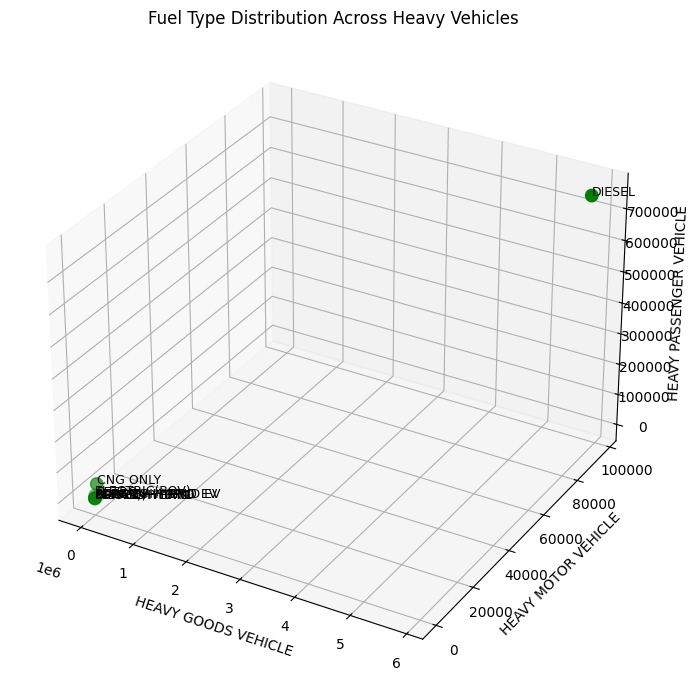

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load your CSV (make sure the file is in the same directory or provide full path)
df = pd.read_csv("vehicle_fuel.csv")

# Remove commas and convert all numeric columns (except first) to integers
for col in df.columns[1:]:
    df[col] = df[col].astype(str).str.replace(",", "").astype(int)

# Set index to Vehicle Category for easier lookup
df.set_index("Vehicle_Category", inplace=True)

# Extract values for the three specified vehicle types (x, y, z axes)
x = df.loc["HEAVY GOODS VEHICLE"].drop("Total")
y = df.loc["HEAVY MOTOR VEHICLE"].drop("Total")
z = df.loc["HEAVY PASSENGER VEHICLE"].drop("Total")
fuel_types = x.index  # same for all rows

# Create 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='green', s=80)

# Label each point
for i, fuel in enumerate(fuel_types):
    ax.text(x[i], y[i], z[i], fuel, fontsize=9)

ax.set_xlabel("HEAVY GOODS VEHICLE")
ax.set_ylabel("HEAVY MOTOR VEHICLE")
ax.set_zlabel("HEAVY PASSENGER VEHICLE")
ax.set_title("Fuel Type Distribution Across Heavy Vehicles")

plt.tight_layout()
plt.show()


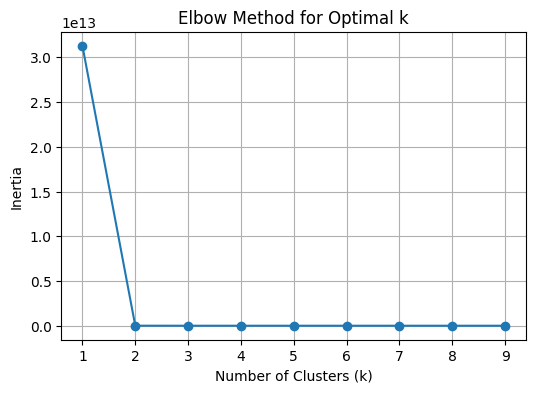

Silhouette Scores:
k=2 → Silhouette Score: 0.8971
k=3 → Silhouette Score: 0.7268
k=4 → Silhouette Score: 0.5457
k=5 → Silhouette Score: 0.5715
k=6 → Silhouette Score: 0.4660


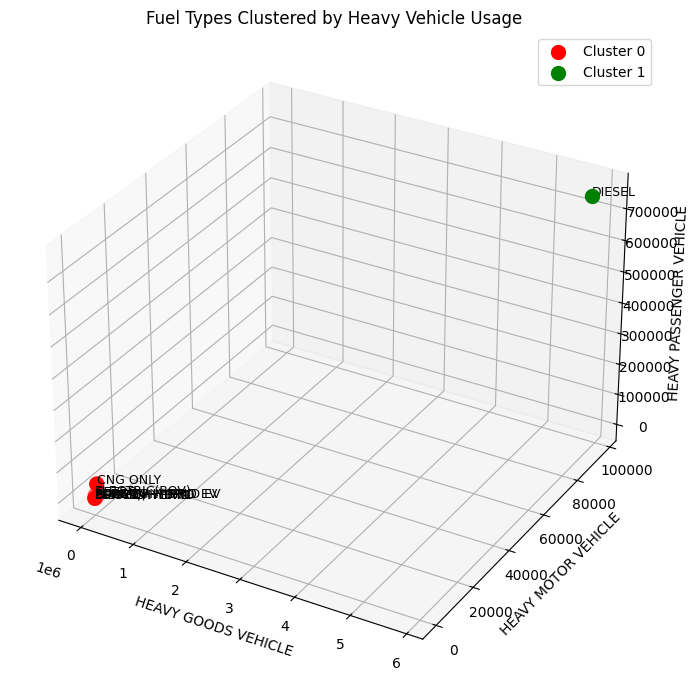


=== Cluster Assignments (Fuel Type → Cluster) ===
CNG ONLY: Cluster 0
DIESEL: Cluster 1
DIESEL/HYBRID: Cluster 0
ELECTRIC(BOV): Cluster 0
PETROL: Cluster 0
PETROL/HYBRID: Cluster 0
PLUG-IN HYBRID EV: Cluster 0
PURE EV: Cluster 0
SOLAR: Cluster 0
STRONG HYBRID EV: Cluster 0


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

# Load and clean data
df = pd.read_csv("vehicle_fuel.csv")
for col in df.columns[1:]:
    df[col] = df[col].astype(str).str.replace(",", "").astype(int)
df.set_index("Vehicle_Category", inplace=True)

# Select the 3 vehicle types as features for each fuel type (i.e., columns become rows)
selected_vehicles = ["HEAVY GOODS VEHICLE", "HEAVY MOTOR VEHICLE", "HEAVY PASSENGER VEHICLE"]
fuel_data = df.loc[selected_vehicles].drop("Total", axis=1).T  # Transpose to make fuel types as rows
fuel_data.columns = ['HEAVY GOODS VEHICLE', 'HEAVY MOTOR VEHICLE', 'HEAVY PASSENGER VEHICLE']

# 1. Elbow Method
inertia = []
K_range = range(1, 10)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(fuel_data)
    inertia.append(km.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# 2. Silhouette Score for k=2 to k=6
print("Silhouette Scores:")
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(fuel_data)
    score = silhouette_score(fuel_data, labels)
    print(f"k={k} → Silhouette Score: {score:.4f}")

# 3. KMeans Clustering (let’s say k=3 based on elbow/silhouette)
k_opt = 2
kmeans = KMeans(n_clusters=k_opt, random_state=42)
fuel_data['Cluster'] = kmeans.fit_predict(fuel_data)

# 4. 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'green', 'blue', 'purple', 'orange']
for cluster in range(k_opt):
    cluster_data = fuel_data[fuel_data['Cluster'] == cluster]
    ax.scatter(
        cluster_data['HEAVY GOODS VEHICLE'],
        cluster_data['HEAVY MOTOR VEHICLE'],
        cluster_data['HEAVY PASSENGER VEHICLE'],
        s=100,
        color=colors[cluster % len(colors)],
        label=f'Cluster {cluster}'
    )
    for idx in cluster_data.index:
        x, y, z = cluster_data.loc[idx, ['HEAVY GOODS VEHICLE', 'HEAVY MOTOR VEHICLE', 'HEAVY PASSENGER VEHICLE']]
        ax.text(x, y, z, idx, fontsize=9)

ax.set_xlabel("HEAVY GOODS VEHICLE")
ax.set_ylabel("HEAVY MOTOR VEHICLE")
ax.set_zlabel("HEAVY PASSENGER VEHICLE")
ax.set_title("Fuel Types Clustered by Heavy Vehicle Usage")
ax.legend()
plt.tight_layout()
plt.show()

# Print metadata: fuel type → cluster value
print("\n=== Cluster Assignments (Fuel Type → Cluster) ===")
for fuel_type, cluster_label in zip(fuel_data.index, fuel_data['Cluster']):
    print(f"{fuel_type}: Cluster {cluster_label}")


In [17]:
# Print metadata: fuel type → cluster value
print("\n=== Cluster Assignments (Fuel Type → Cluster) ===")
for fuel_type, cluster_label in zip(fuel_data.index, fuel_data['Cluster']):
    print(f"{fuel_type}: Cluster {cluster_label}")



=== Cluster Assignments (Fuel Type → Cluster) ===
CNG ONLY: Cluster 2
DIESEL: Cluster 1
DIESEL/HYBRID: Cluster 0
ELECTRIC(BOV): Cluster 0
PETROL: Cluster 0
PETROL/HYBRID: Cluster 0
PLUG-IN HYBRID EV: Cluster 0
PURE EV: Cluster 0
SOLAR: Cluster 0
STRONG HYBRID EV: Cluster 0


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Load and clean CSV
df = pd.read_csv('vehicle_fuel2.csv')

# Clean numbers (remove commas and convert to int)
df.iloc[:, 1:] = df.iloc[:, 1:].replace({',': ''}, regex=True).apply(pd.to_numeric)

# Get list of vehicle categories
vehicle_categories = df['Vehicle_Category'].tolist()

# Split data into chunks of 3 rows each
chunks = [df.iloc[i:i+3] for i in range(0, len(df), 3)]

def plot_elbow_and_silhouette(data, title_prefix=''):
    distortions = []
    silhouettes = []
    K = range(2, 7)
    for k in K:
        kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
        labels = kmeans.fit_predict(data)
        distortions.append(kmeans.inertia_)
        silhouettes.append(silhouette_score(data, labels))

    # Plot Elbow
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(K, distortions, 'bo-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia (SSE)')
    plt.title(f'{title_prefix} Elbow Method')

    # Plot Silhouette
    plt.subplot(1, 2, 2)
    plt.plot(K, silhouettes, 'go-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title(f'{title_prefix} Silhouette Score')
    plt.tight_layout()
    plt.show()

def process_chunk(chunk, chunk_num):
    data = chunk.drop(columns=['Vehicle_Category'])
    # Use top 3 columns with the highest sum in this chunk
    top3_cols = data.sum().sort_values(ascending=False).head(3).index.tolist()
    selected_data = data[top3_cols].copy()

    # Normalize
    scaler = StandardScaler()
    scaled = scaler.fit_transform(selected_data)

    # Elbow and Silhouette
    plot_elbow_and_silhouette(scaled, title_prefix=f'Chunk {chunk_num}')

    # Apply KMeans with optimal k (for example k=2 or 3)
    kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)
    labels = kmeans.fit_predict(scaled)

    # 3D Plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(scaled[:, 0], scaled[:, 1], scaled[:, 2], c=labels, cmap='Set1', s=100)
    ax.set_xlabel(top3_cols[0])
    ax.set_ylabel(top3_cols[1])
    ax.set_zlabel(top3_cols[2])
    ax.set_title(f'Chunk {chunk_num} Clustering')
    plt.show()

    # Print cluster assignments
    print(f"\nCluster assignments for Chunk {chunk_num}:")
    for i, vehicle in enumerate(chunk['Vehicle_Category']):
        print(f"{vehicle}: Cluster {labels[i]}")

# Loop through chunks and process
for i, chunk in enumerate(chunks):
    process_chunk(chunk, i+1)


ValueError: Number of labels is 3. Valid values are 2 to n_samples - 1 (inclusive)